Euclidean Distance:
Accuracy: 0.9295774647887324
Confusion Matrix:
 [[60  0]
 [ 5  6]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        60
         1.0       1.00      0.55      0.71        11

    accuracy                           0.93        71
   macro avg       0.96      0.77      0.83        71
weighted avg       0.93      0.93      0.92        71


Manhattan Distance:
Accuracy: 0.9295774647887324
Confusion Matrix:
 [[60  0]
 [ 5  6]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        60
         1.0       1.00      0.55      0.71        11

    accuracy                           0.93        71
   macro avg       0.96      0.77      0.83        71
weighted avg       0.93      0.93      0.92        71



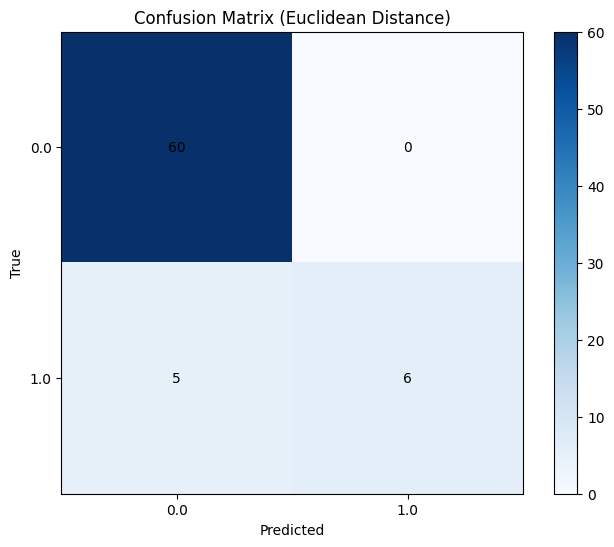

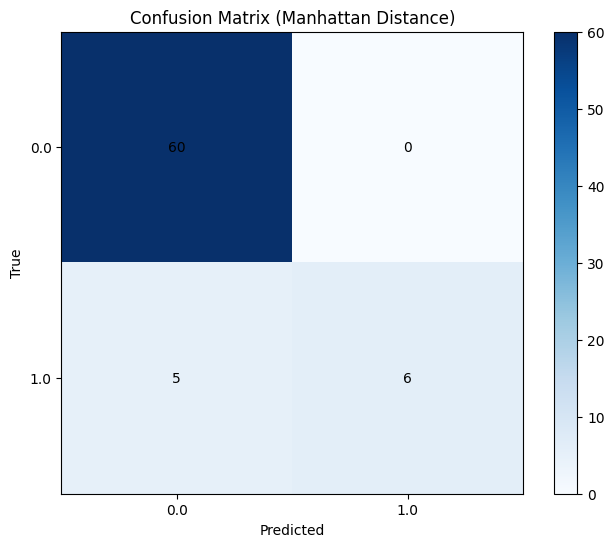

In [ ]:
import numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Function to calculate Euclidean distance between two vectors
def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2)**2))

# Function to calculate Manhattan distance between two vectors
def manhattan_distance(vec1, vec2):
    return np.sum(np.abs(vec1 - vec2))

# Function to implement k-NN classifier using Euclidean distance
def knn_classifier(training_data, test_instance, k):
    distances = [euclidean_distance(test_instance, x) for x in training_data]
    sorted_indices = np.argsort(distances)
    k_nearest_neighbors = sorted_indices[:k]
    return k_nearest_neighbors

# Function to implement k-NN classifier using Manhattan distance
def knn_classifier_manhattan(training_data, test_instance, k):
    distances = [manhattan_distance(test_instance, x) for x in training_data]
    sorted_indices = np.argsort(distances)
    k_nearest_neighbors = sorted_indices[:k]
    return k_nearest_neighbors

# Function to convert categorical variables to numeric using label encoding
def label_encoding(data):
    unique_labels = list(set(data))
    label_dict = {label: i for i, label in enumerate(unique_labels)}
    encoded_data = [label_dict[label] for label in data]
    return encoded_data

# Function to convert categorical variables to numeric using One-Hot encoding
def one_hot_coding(variables):
    unique_categories = list(set(variables))
    category_to_index = {category: i for i, category in enumerate(unique_categories)}
    encoded_labels = []
    for var in variables:
        binary_vector = [0] * len(unique_categories)
        binary_vector[category_to_index[var]] = 1
        encoded_labels.append(binary_vector)
    return encoded_labels, category_to_index

# Load ARFF file
data, meta = arff.loadarff(r"C:\Users\Harini C J\Downloads\Eurlex-dc")

# Convert ARFF data to a numpy array
dataset = np.array(data.tolist(), dtype=float)

# Assume the last column is the target variable
X = dataset[:, :-1]
y = dataset[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to predict labels for the test set using Euclidean distance
def predict_labels(X_train, y_train, test_instance, k):
    k_nearest_neighbors = knn_classifier(X_train, test_instance, k)
    k_nearest_labels = y_train[k_nearest_neighbors]
    predicted_label = np.argmax(np.bincount(k_nearest_labels.astype(int)))
    return predicted_label

# Predict labels for the test set using Euclidean distance
y_pred_euclidean = [predict_labels(X_train, y_train, test_instance, k=15) for test_instance in X_test]

# Function to predict labels for the test set using Manhattan distance
def predict_labels_manhattan(X_train, y_train, test_instance, k):
    k_nearest_neighbors = knn_classifier_manhattan(X_train, test_instance, k)
    k_nearest_labels = y_train[k_nearest_neighbors]
    predicted_label = np.argmax(np.bincount(k_nearest_labels.astype(int)))
    return predicted_label

# Predict labels for the test set using Manhattan distance
y_pred_manhattan = [predict_labels_manhattan(X_train, y_train, test_instance, k=15) for test_instance in X_test]

# Evaluate the performance for Euclidean distance
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
conf_matrix_euclidean = confusion_matrix(y_test, y_pred_euclidean)
classification_rep_euclidean = classification_report(y_test, y_pred_euclidean)

# Evaluate the performance for Manhattan distance
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
conf_matrix_manhattan = confusion_matrix(y_test, y_pred_manhattan)
classification_rep_manhattan = classification_report(y_test, y_pred_manhattan)

# Print evaluation metrics for Euclidean distance
print("Euclidean Distance:")
print("Accuracy:", accuracy_euclidean)
print("Confusion Matrix:\n", conf_matrix_euclidean)
print("Classification Report:\n", classification_rep_euclidean)

# Print evaluation metrics for Manhattan distance
print("\nManhattan Distance:")
print("Accuracy:", accuracy_manhattan)
print("Confusion Matrix:\n", conf_matrix_manhattan)
print("Classification Report:\n", classification_rep_manhattan)



In [ ]:
def predict_labels(X_train, y_train, test_instance, k):
    k_nearest_neighbors = knn_classifier(X_train, test_instance, k)
    k_nearest_labels = y_train[k_nearest_neighbors]
    predicted_label = np.argmax(np.bincount(k_nearest_labels.astype(int)))
    return predicted_label

# Predict labels for the test set using Euclidean distance and print predicted class
for i, test_instance in enumerate(X_test):
    predicted_label = predict_labels(X_train, y_train, test_instance, k=15)
    print(f"Test instance {i + 1}: Predicted class - {int(predicted_label)}")

# Function to predict labels for the test set using Manhattan distance
def predict_labels_manhattan(X_train, y_train, test_instance, k):
    k_nearest_neighbors = knn_classifier_manhattan(X_train, test_instance, k)
    k_nearest_labels = y_train[k_nearest_neighbors]
    predicted_label = np.argmax(np.bincount(k_nearest_labels.astype(int)))
    return predicted_label

# Predict labels for the test set using Manhattan distance and print predicted class
for i, test_instance in enumerate(X_test):
    predicted_label = predict_labels_manhattan(X_train, y_train, test_instance, k=15)
    print(f"Test instance {i + 1}: Predicted class - {int(predicted_label)}")

Test instance 1: Predicted class - 0
Test instance 2: Predicted class - 0
Test instance 3: Predicted class - 0
Test instance 4: Predicted class - 0
Test instance 5: Predicted class - 0
Test instance 6: Predicted class - 0
Test instance 7: Predicted class - 0
Test instance 8: Predicted class - 0
Test instance 9: Predicted class - 0
Test instance 10: Predicted class - 0
Test instance 11: Predicted class - 0
Test instance 12: Predicted class - 1
Test instance 13: Predicted class - 0
Test instance 14: Predicted class - 0
Test instance 15: Predicted class - 0
Test instance 16: Predicted class - 1
Test instance 17: Predicted class - 0
Test instance 18: Predicted class - 0
Test instance 19: Predicted class - 0
Test instance 20: Predicted class - 0
Test instance 21: Predicted class - 0
Test instance 22: Predicted class - 0
Test instance 23: Predicted class - 0
Test instance 24: Predicted class - 0
Test instance 25: Predicted class - 0
Test instance 26: Predicted class - 0
Test instance 27: Pre

In [ ]:
# One-Hot Encoding
one_hot_encoded_data = one_hot_coding(y)
print("One-Hot Encoded Data:")
print(one_hot_encoded_data)

One-Hot Encoded Data:
([[1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], 